In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 35.6 MB/s eta 0:00:0000:0100:01


In [2]:
import os
import pickle
import pandas as pd
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import glob
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [4]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

E0000 00:00:1699804731.950485      32 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1699804731.950532      32 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1699804731.950548      32 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)


In [5]:
DATA_DIR = "/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset"
file_extension = "*.jpg"

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [6]:
image_paths = glob.glob(os.path.join(DATA_DIR, "*", file_extension))

In [7]:
data = pd.DataFrame(image_paths, columns=["Image_Path"])

In [8]:
data["Class_Label"] = data["Image_Path"].apply(lambda x: os.path.basename(os.path.dirname(x)))

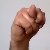

In [9]:
from PIL import Image
from IPython.display import display
sample_image = Image.open(data["Image_Path"].iloc[0])
display(sample_image)

In [10]:
data

,Image_Path,Class_Label
0,/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset/N...,N
1,/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset/N...,N
2,/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset/N...,N
3,/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset/N...,N
4,/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset/N...,N
...,...,...
22495,/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset/J...,J
22496,/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset/J...,J
22497,/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset/J...,J
22498,/kaggle/input/asl-a-to-o/ASL-A_to_ O-dataset/J...,J


In [11]:
data['Class_Label'].unique()

array(['N', 'B', 'I', 'F', 'H', 'E', 'M', 'K', 'G', 'A', 'O', 'C', 'L',
       'D', 'J'], dtype=object)

In [12]:
print(data.columns)

Index(['Image_Path', 'Class_Label'], dtype='object')


In [13]:
counts = data['Class_Label'].value_counts()
print(counts)

Class_Label
N    1500
B    1500
I    1500
F    1500
H    1500
E    1500
M    1500
K    1500
G    1500
A    1500
O    1500
C    1500
L    1500
D    1500
J    1500
Name: count, dtype: int64


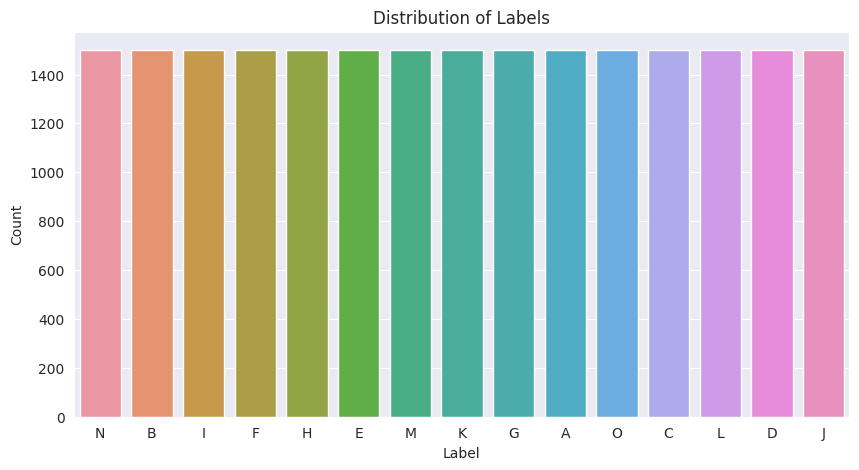

In [14]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.countplot(data=data,x='Class_Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

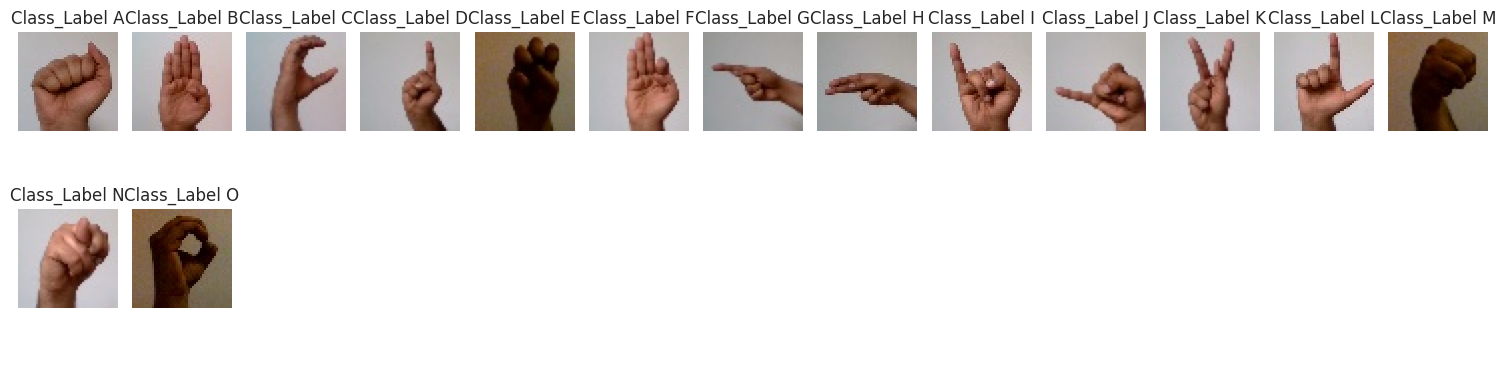

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 13, figsize=(15, 4))

for i, (Class_Label, image) in enumerate(data.groupby('Class_Label').first().reset_index()[['Class_Label', 'Image_Path']].itertuples(index=False)):
    ax = axs[i // 13, i % 13]
    img = Image.open(image)  # Load the image using Pillow
    ax.imshow(img)
    ax.set_title('Class_Label {}'.format(Class_Label))
    ax.axis('off')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


In [16]:
data = []
labels = []

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                data_aux = []  # Initialize data_aux for each hand

                x_ = []
                y_ = []

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    # Normalize coordinates to [0, 1]
                    normalized_x = (x - min(x_)) / (max(x_) - min(x_))
                    normalized_y = (y - min(y_)) / (max(y_) - min(y_))

                    data_aux.append(normalized_x)
                    data_aux.append(normalized_y)

                data.append(data_aux)
                labels.append(dir_)

In [17]:
f = open('data1.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

In [18]:
data_dict = pickle.load(open('./data1.pickle', 'rb'))

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [20]:
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [22]:
print("Shape of x_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (13488, 42)
Shape of y_train: (13488,)


In [23]:
# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [24]:
# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Predict on the training data
y_train_pred = model.predict(X_train)
# Predict on the test data
y_test_pred = model.predict(X_test)

In [26]:
# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Training Accuracy: 100.00%


In [27]:
# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Testing Accuracy: 99.58%


In [28]:
from sklearn.metrics import accuracy_score, classification_report
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.99      0.98       177
           B       1.00      1.00      1.00       292
           C       1.00      0.99      0.99       299
           D       1.00      1.00      1.00       307
           E       1.00      0.84      0.91        19
           F       1.00      1.00      1.00       323
           G       1.00      1.00      1.00       303
           H       1.00      1.00      1.00       304
           I       1.00      1.00      1.00       257
           J       1.00      0.99      0.99       229
           K       0.99      0.99      0.99       305
           L       1.00      1.00      1.00       321
           M       0.50      1.00      0.67         1
           N       1.00      1.00      1.00       229
           O       1.00      1.00      1.00         7

    accuracy                           1.00      3373
   macro avg       0.96      0.99      0.97      3373
wei

In [29]:
f = open('model4.p', 'wb')
pickle.dump({'model': model}, f)
f.close()